Basic AlexNet Example
--------

This notebook shows how to use MXNet construct AlexNet. AlexNet is made by Alex Krizhevsky in 2012.

We  will show how to train AlexNet in Python with single/multi GPU. All you need is to write a piece of Python code to describe network, then MXNet will help you finish all work without any of your effort. 

Generally, we need 

- Declare symbol network
- Declare data iterator
- Bind symbol network to device to model
- Fit the model

In [1]:
import mxnet as mx

Now we have successully load MXNet. we will start declare a symbolic network. 

In [2]:
input_data = mx.symbol.Variable(name="data")

We use a special symbol ```Variable``` to represent input data.

In [3]:
# stage 1
conv1 = mx.symbol.Convolution(data=input_data, kernel=(11, 11), stride=(4, 4), num_filter=96)
relu1 = mx.symbol.Activation(data=conv1, act_type="relu")
pool1 = mx.symbol.Pooling(data=relu1, pool_type="max", kernel=(3, 3), stride=(2,2))
lrn1 = mx.symbol.LRN(data=pool1, alpha=0.0001, beta=0.75, knorm=1, nsize=5)
# stage 2
conv2 = mx.symbol.Convolution(data=lrn1, kernel=(5, 5), pad=(2, 2), num_filter=256)
relu2 = mx.symbol.Activation(data=conv2, act_type="relu")
pool2 = mx.symbol.Pooling(data=relu2, kernel=(3, 3), stride=(2, 2))
lrn2 = mx.symbol.LRN(data=pool2, alpha=0.0001, beta=0.75, knorm=1, nsize=5)
# stage 3
conv3 = mx.symbol.Convolution(data=lrn2, kernel=(3, 3), pad=(1, 1), num_filter=384)
relu3 = mx.symbol.Activation(data=conv3, act_type="relu")
conv4 = mx.symbol.Convolution(data=relu3, kernel=(3, 3), pad=(1, 1), num_filter=384)
relu4 = mx.symbol.Activation(data=conv4, act_type="relu")
conv5 = mx.symbol.Convolution(data=relu4, kernel=(3, 3), pad=(1, 1), num_filter=256)
relu5 = mx.symbol.Activation(data=conv5, act_type="relu")
pool3 = mx.symbol.Pooling(data=relu5, kernel=(3, 3), stride=(2, 2))
# stage 4
flatten = mx.symbol.Flatten(data=pool3)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=4096)
relu6 = mx.symbol.Activation(data=fc1, act_type="relu")
dropout1 = mx.symbol.Dropout(data=relu6, p=0.5)
# stage 5
fc2 = mx.symbol.FullyConnected(data=dropout1, num_hidden=4096)
relu7 = mx.symbol.Activation(data=fc2, act_type="relu")
dropout2 = mx.symbol.Dropout(data=relu7, p=0.5)
# stage 6
fc3 = mx.symbol.FullyConnected(data=dropout2, num_hidden=1000)
softmax = mx.symbol.Softmax(data=fc3)

Now we have a AlexNet. The ```softmax``` symbol contains all network structures. We can visualize our network structure. (require ```graphviz``` package)

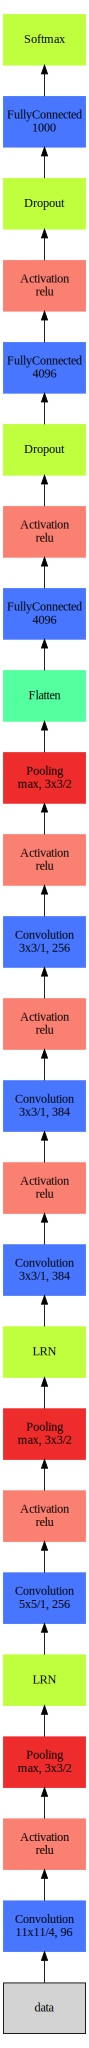

In [4]:
mx.visualization.network2dot("AlexNet", softmax)

After define our network, we are able to create our model.